In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import interactive
interactive(True)
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [3]:
def solid_volume_fraction(density):
    return (0.4*density*1.2*(0.0015875)**2*np.pi)/(1.2*0.4)

def k_tb(freq):
    u = 0.00196*freq + 0.00081
    return 57.53e-6*u**2

def k_tv(density, freq):
    phi = solid_volume_fraction(density)
    u = 0.00196*freq + 0.00081
    reynolds = (u*0.003175)/(9.509e-7)
    C_d = 1 + 10*reynolds**(-2/3)
    return 0.9*(C_d**(2/3))*(phi**(2/3))*((u**2))

In [4]:
low_reynolds = k_tb(10)

In [9]:
nepf_turbulence = pd.DataFrame(columns = ['Re_c', 'Phi', 'Turbulence'])
nepf_turbulence['Re_c'] = [68.15, 68.15, 68.15, 133.59, 133.59, 133.59, 199.03, 199.03, 199.03]
nepf_turbulence['Phi'] = [0.22, 0.63, 1.15, 0.22, 0.63, 1.15, 0.22, 0.63, 1.15]
nepf_turbulence['Turbulence'] = [k_tb(10), k_tb(10), k_tb(10), 
                                k_tb(20) + k_tv(278, 20), k_tb(20) + k_tv(800, 20), k_tb(20) + k_tv(1450, 20), 
                                k_tb(30) + k_tv(278, 30), k_tb(30) + k_tv(800, 30), k_tb(30) + k_tv(1450, 30)]

In [22]:
nepf_turbulence

,Re_c,Phi,Turbulence
0,68.15,0.22,2.396516e-08
1,68.15,0.63,2.396516e-08
2,68.15,1.15,2.396516e-08
3,133.59,0.22,3.034764e-05
4,133.59,0.63,6.130389e-05
5,133.59,1.15,9.108771e-05
6,199.03,0.22,6.443949e-05
7,199.03,0.63,1.301622e-04
8,199.03,1.15,1.933958e-04


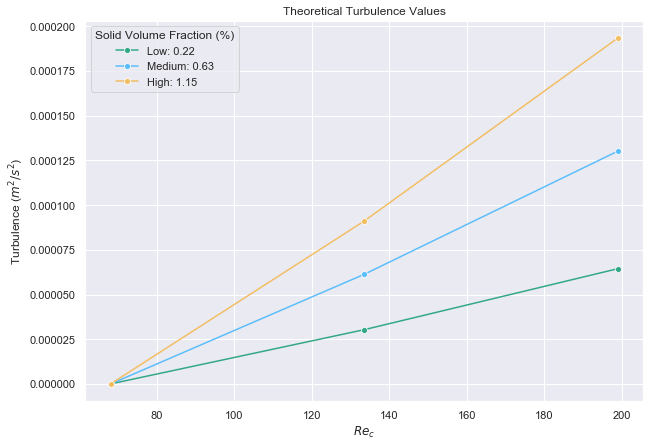

In [47]:
plt.figure(1, figsize=(10,7))
sns.lineplot('Re_c', 'Turbulence', data = nepf_turbulence[nepf_turbulence['Phi'] == 0.22], color = '#32a887', marker = 'o');
sns.lineplot('Re_c', 'Turbulence', data = nepf_turbulence[nepf_turbulence['Phi'] == 0.63], color = '#5bbefc', marker = 'o');
sns.lineplot('Re_c', 'Turbulence', data = nepf_turbulence[nepf_turbulence['Phi'] == 1.15], color = '#f2be63', marker = 'o');
plt.xlabel('$Re_{c}$')
plt.ylabel('Turbulence ($m^{2}/s^{2}$)')
plt.legend(['Low: 0.22', 'Medium: 0.63', 'High: 1.15'], title = 'Solid Volume Fraction (%)');
plt.title('Theoretical Turbulence Values');